In [ ]:
import pandas as pd
import numpy as np

In [ ]:
customers=pd.read_csv("/content/Customers.csv")

In [ ]:
customers.sample(4)

,CustomerID,CustomerName,Region,SignupDate
196,C0197,Christina Harvey,Europe,2023-03-21
78,C0079,Brian Murillo,North America,2022-02-02
162,C0163,Tiffany Cain,South America,2023-06-08
31,C0032,Dustin Campbell,South America,2024-04-17


In [ ]:
products=pd.read_csv("/content/Products.csv")

In [ ]:
products.sample(4)

,ProductID,ProductName,Category,Price
98,P099,SoundWave Mystery Book,Books,354.29
49,P050,ActiveWear Smartwatch,Electronics,437.65
62,P063,TechPro Novel,Books,33.59
21,P022,HomeSense Wall Art,Home Decor,137.54


In [ ]:

transactions=pd.read_csv("/content/Transactions.csv")

In [ ]:
transactions.sample(4)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
260,T00957,C0076,P051,2024-02-21 04:21:27,3,195.48,65.16
570,T00072,C0167,P048,2024-05-23 19:17:40,3,1249.20,416.40
583,T00844,C0118,P048,2024-12-18 04:17:20,4,1665.60,416.40
746,T00479,C0144,P035,2024-04-27 20:02:17,4,122.36,30.59


In [ ]:
customer_transactions=pd.merge(customers,transactions,on="CustomerID",how="inner")

In [ ]:
customer_transactions.sample(3)

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
575,C0115,Joshua Hamilton,Asia,2024-11-11,T00959,P037,2024-09-29 10:16:02,2,919.72,459.86
199,C0042,Heather Riley,North America,2023-03-15,T00614,P076,2024-04-28 14:38:55,1,429.29,429.29
604,C0122,Corey Ruiz,North America,2022-05-06,T00800,P095,2024-08-25 16:04:54,3,681.78,227.26


In [ ]:
data=pd.merge(customer_transactions,products,on="ProductID",how="inner")
df=data

In [ ]:
df.sample(3)

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
78,C0017,Jennifer King,Europe,2023-12-05,T00854,P059,2024-07-14 10:29:11,1,303.20,303.20,SoundWave Jeans,Clothing,303.20
255,C0053,Albert Burke,Europe,2022-06-18,T00497,P087,2024-06-21 02:02:45,4,1160.68,290.17,TechPro Running Shoes,Clothing,290.17
350,C0072,Sarah Scott,North America,2024-07-24,T00461,P088,2024-09-17 03:59:29,1,263.55,263.55,SoundWave Headphones,Electronics,263.55


<div style="text-align: center; color: red;">
  <h1>Exploratory data analysis</h1>
</div>


In [ ]:
df.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'TransactionID',
       'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price_x',
       'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   CustomerName     1000 non-null   object 
 2   Region           1000 non-null   object 
 3   SignupDate       1000 non-null   object 
 4   TransactionID    1000 non-null   object 
 5   ProductID        1000 non-null   object 
 6   TransactionDate  1000 non-null   object 
 7   Quantity         1000 non-null   int64  
 8   TotalValue       1000 non-null   float64
 9   Price_x          1000 non-null   float64
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0
TransactionID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0


In [ ]:
df.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
print(df.dtypes)

CustomerID                 object
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
TransactionID              object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price_x                   float64
ProductName                object
Category                   object
Price_y                   float64
dtype: object


Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


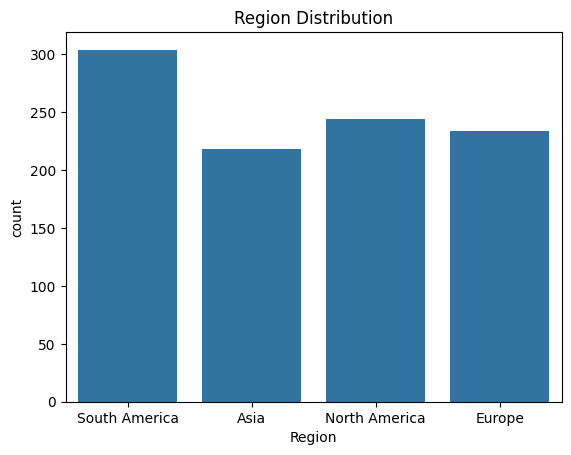

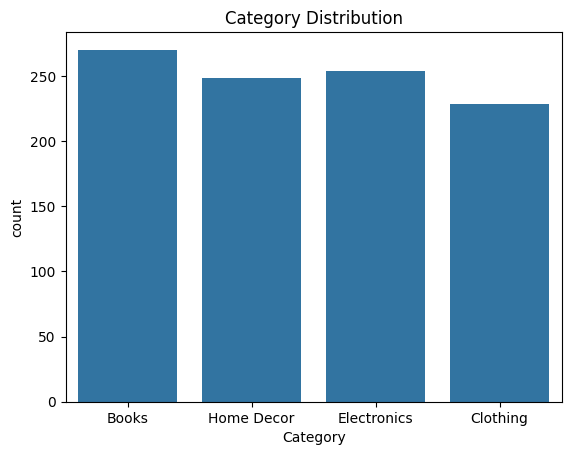

In [ ]:
import seaborn as sns
print(df['Region'].value_counts())


sns.countplot(data=df, x='Region')
plt.title('Region Distribution')
plt.show()


sns.countplot(data=df, x='Category')
plt.title('Category Distribution')
plt.show()


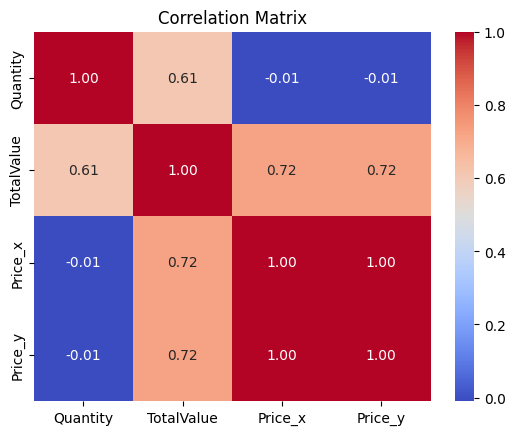

In [ ]:
corr_matrix = df[['Quantity', 'TotalValue', 'Price_x', 'Price_y']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

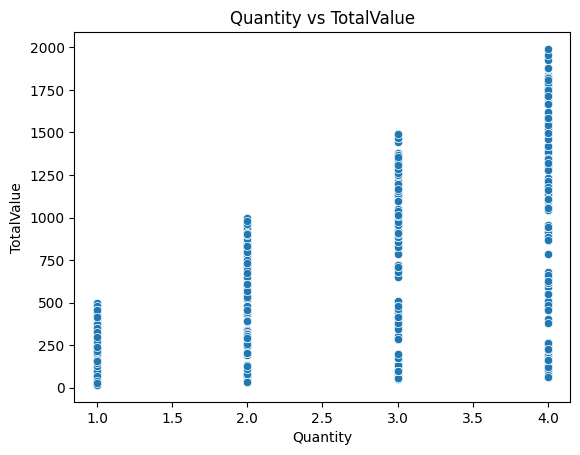

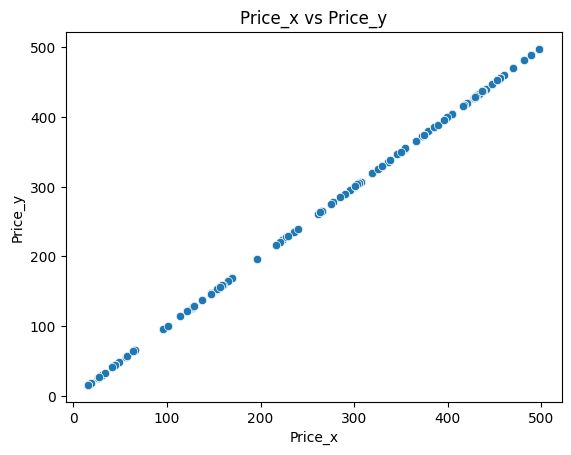

In [ ]:
sns.scatterplot(data=df, x='Quantity', y='TotalValue')
plt.title('Quantity vs TotalValue')
plt.show()


sns.scatterplot(data=df, x='Price_x', y='Price_y')
plt.title('Price_x vs Price_y')
plt.show()

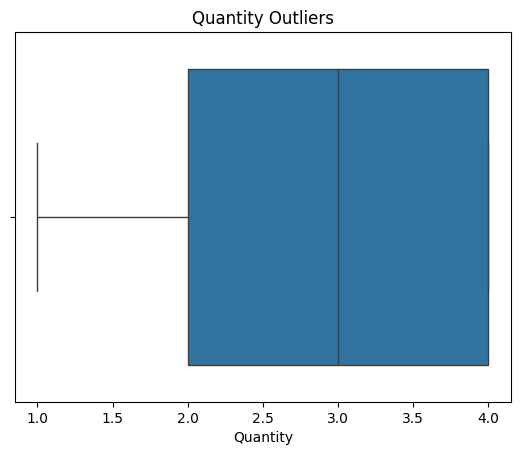

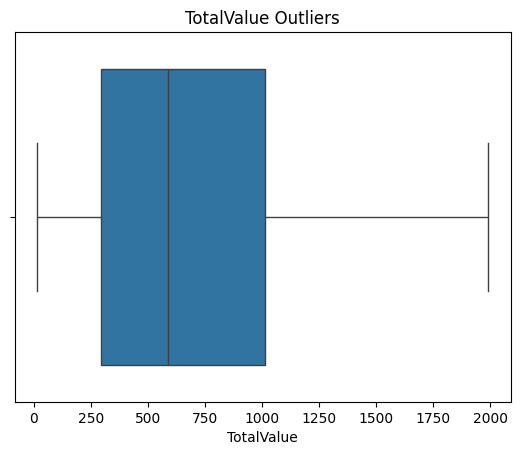

In [ ]:
sns.boxplot(data=df, x='Quantity')
plt.title('Quantity Outliers')
plt.show()


sns.boxplot(data=df, x='TotalValue')
plt.title('TotalValue Outliers')
plt.show()

In [ ]:
df['DaysSinceSignup'] = (pd.Timestamp.now() - df['SignupDate']).dt.days


print(df[['CustomerID', 'DaysSinceSignup']].head())

  CustomerID  DaysSinceSignup
0      C0001              931
1      C0001              931
2      C0001              931
3      C0001              931
4      C0001              931


<div style="text-align: center;">
  <h1>BUSINESS INSIGHTS</h1>
</div>


In [ ]:
data['Quantity'].value_counts()

,count
Quantity,
4,261
3,254
2,246
1,239


In [ ]:
top_5_products=data.groupby('ProductName')['Quantity'].sum().nlargest(5)

In [ ]:
top_5_products

,Quantity
ProductName,
ActiveWear Smartwatch,100
SoundWave Headphones,97
HomeSense Desk Lamp,81
ActiveWear Rug,79
SoundWave Cookbook,78


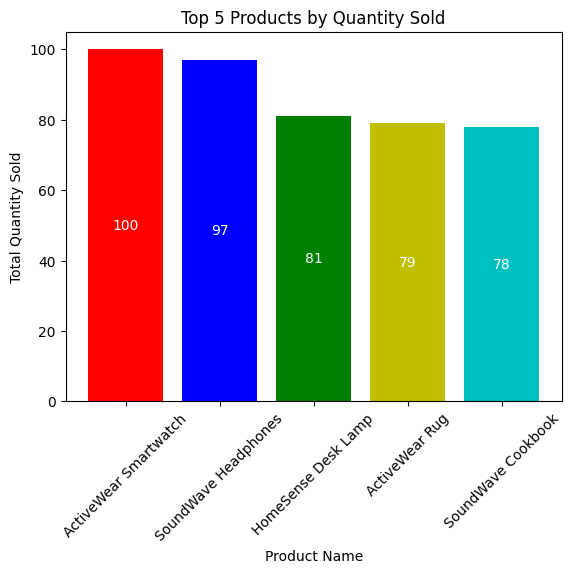

In [ ]:
import matplotlib.pyplot as plt
colors = ['r', 'b', 'g', 'y', 'c']
plt.bar(top_5_products.index, top_5_products.values, color=colors)
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 5 Products by Quantity Sold')
plt.xticks(rotation=45)
for i, value in enumerate(top_5_products.values):
    plt.text(i, value / 2, str(value), ha='center', va='center', color='white', fontsize=10)
plt.show()

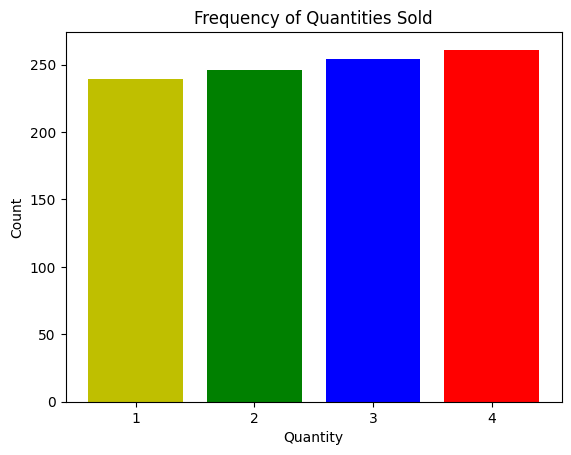

In [ ]:
import matplotlib.pyplot as plt
Quantity = data['Quantity'].value_counts()
colors = ['r', 'b', 'g', 'y']
plt.bar(Quantity.index, Quantity.values, color=colors)
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Frequency of Quantities Sold')
plt.xticks((1,2,3,4))
plt.show()

In [ ]:
data['Region'].value_counts()

,count
Region,
South America,304
North America,244
Europe,234
Asia,218


In [ ]:
region_product_quantity = data.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()
most_bought_products = region_product_quantity.loc[region_product_quantity.groupby('Region')['Quantity'].idxmax()]
print(most_bought_products)

            Region            ProductName  Quantity
39            Asia      HomeSense T-Shirt        28
67          Europe         ActiveWear Rug        30
170  North America   SoundWave Headphones        37
196  South America  ActiveWear Smartwatch        38


In [ ]:
region_product_quantity

,Region,ProductName,Quantity
0,Asia,ActiveWear Biography,2
1,Asia,ActiveWear Cookbook,8
2,Asia,ActiveWear Cookware Set,12
3,Asia,ActiveWear Headphones,15
4,Asia,ActiveWear Jacket,23
...,...,...,...
247,South America,TechPro Running Shoes,5
248,South America,TechPro Smartwatch,17
249,South America,TechPro T-Shirt,20
250,South America,TechPro Textbook,20


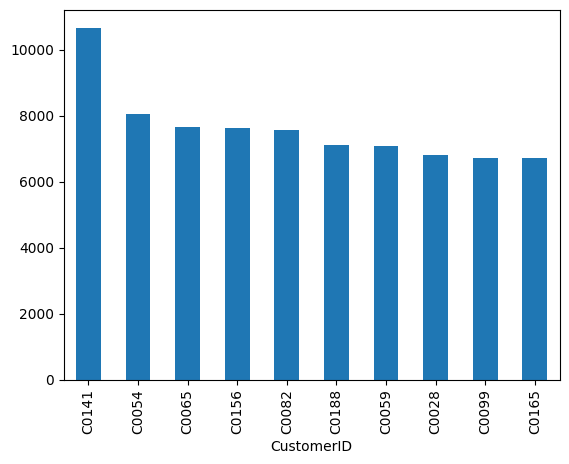

In [ ]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar')
plt.show()

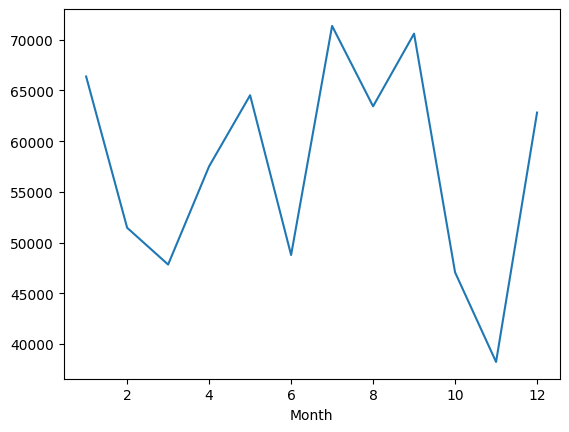

In [ ]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line')
plt.show()

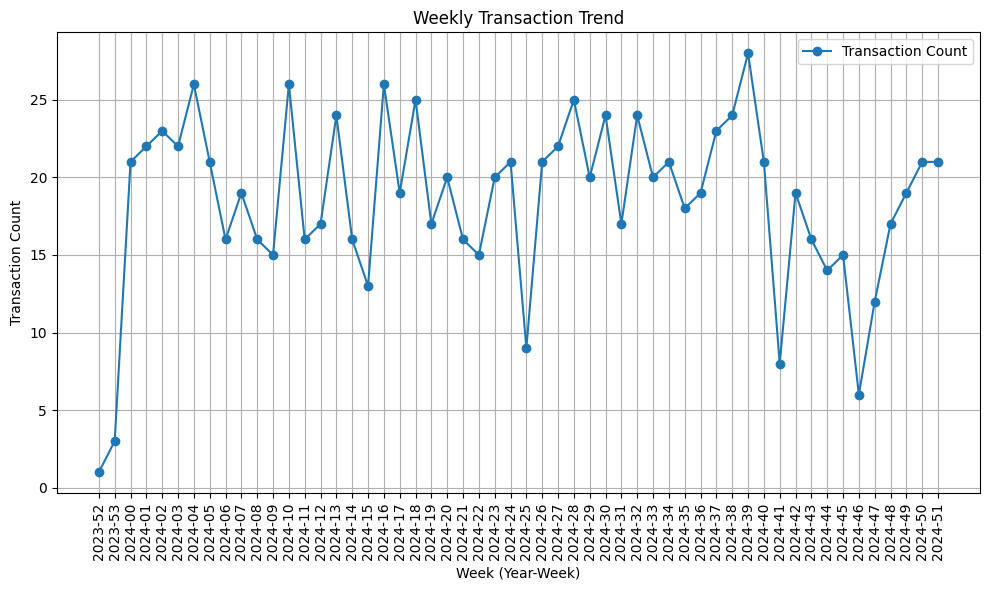

In [ ]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['YearWeek'] = data['TransactionDate'].dt.strftime('%Y-%U')
weekly_trend = data.groupby('YearWeek').agg({'TransactionID': 'count', 'TotalValue': 'sum'}).reset_index()
weekly_trend.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(weekly_trend['YearWeek'], weekly_trend['TransactionCount'], marker='o', label='Transaction Count')
plt.xticks(rotation=90)
plt.xlabel('Week (Year-Week)')
plt.ylabel('Transaction Count')
plt.title('Weekly Transaction Trend')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

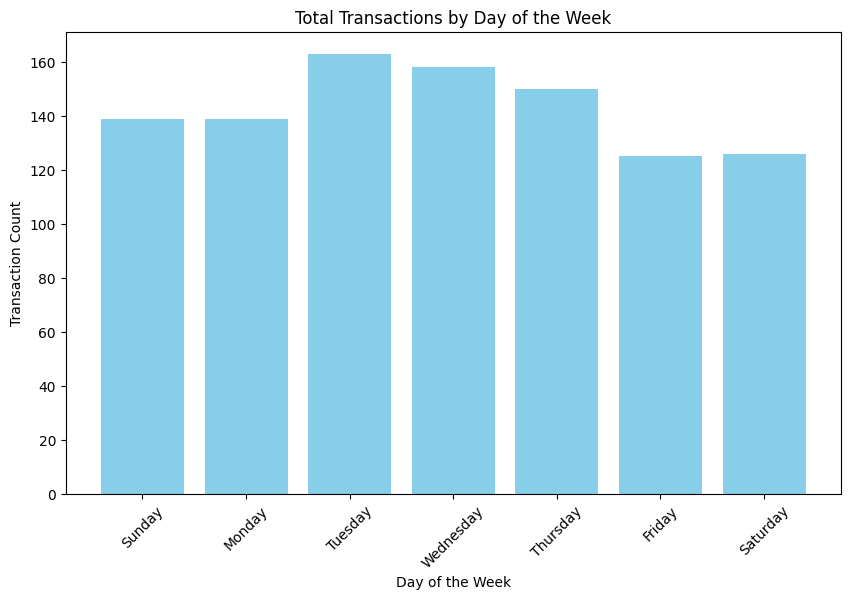

In [ ]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['DayOfWeek'] = data['TransactionDate'].dt.day_name()
daywise_transactions = data.groupby('DayOfWeek').agg({'TransactionID': 'count'}).reset_index()
daywise_transactions.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)
daywise_transactions = daywise_transactions.set_index('DayOfWeek').reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(daywise_transactions.index, daywise_transactions['TransactionCount'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.title('Total Transactions by Day of the Week')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       1000 non-null   object        
 1   CustomerName     1000 non-null   object        
 2   Region           1000 non-null   object        
 3   SignupDate       1000 non-null   datetime64[ns]
 4   TransactionID    1000 non-null   object        
 5   ProductID        1000 non-null   object        
 6   TransactionDate  1000 non-null   datetime64[ns]
 7   Quantity         1000 non-null   int64         
 8   TotalValue       1000 non-null   float64       
 9   Price_x          1000 non-null   float64       
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
 13  DaysSinceSignup  1000 non-null   int64         
 14  YearWeek         1000 non-null   object  

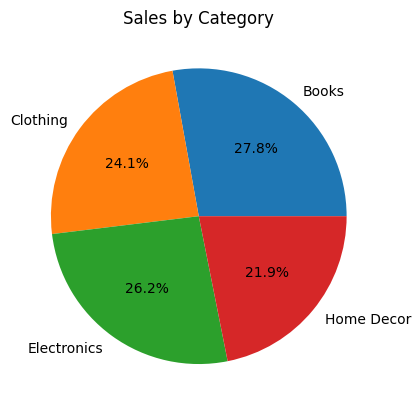

In [ ]:
# 5. Sales by category
category_sales = data.groupby('Category')['TotalValue'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Category')
plt.ylabel('')
plt.show()

In [ ]:
revenue_by_region = data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Revenue by region:\n", revenue_by_region)

Revenue by region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64
